<a href="https://colab.research.google.com/github/cmourlas/ML-algorithms/blob/master/crossvalidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split

In [0]:
from sklearn import datasets
# Load the boston dataset
data = datasets.load_boston()
 
# extract the predictors and target data.
X = data.data
Y = data.target

In [4]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In order to determine the machine learning model’s accuracy, we have to train the model first and then test the performance of a Machine Learning model.

How to do it:

• Bad idea: train the model using the given dataset and then make predictions with the same dataset

• A better option is to split our data into two parts: first part for training our machine learning model, and second part for testing our model

Two scenarios:

• If we have a big dataset, we can do that without any problems

• If we have a small dataset, cross validation is the best option

Summary of basic procedure:

1. Split the dataset into two sets: training set and testing set

2. Train the model on the training set

3. Test the model on the testing set and compute
 performance measure (e.g. MSE)
 
4. Only for cross validation: repeat steps 1 to 3, but use different splits

In [0]:
# Initialize empty list (to be filled with average results afterwards)
ls_total_mse = []
# Initialize empty list (to be filled with max depth afterwards)
ls_max_depth = []


In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

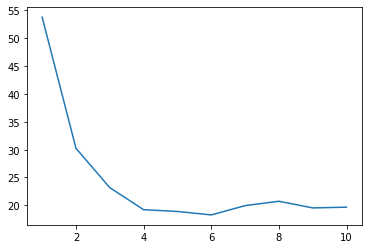

In [7]:
for current_max_depth in np.arange(10):
  # Instantiate repeated cross validation (cv) object
  our_cv = RepeatedKFold(n_splits=10, n_repeats=10)

  # Which model: Instantiate decision trees (dt) regression
  dt_reg = DecisionTreeRegressor(max_depth=current_max_depth+1)

  # initialize empty list for single cv loop results
  ls_mse_test = []

    # Loop to make cross validation
  for i_train, i_test in our_cv.split(X):

    # 1. Split data into training and testing set
    X_train, X_test, Y_train, Y_test = X[i_train], X[i_test], Y[i_train], Y[i_test]

    # 2. Train DT regressor with train data - fit the model with training data
    dt_reg.fit(X_train, Y_train)

    # 3. Test regressor with test data
    y_pred_test = dt_reg.predict(X_test)

    # 4. Calc metric (e.g. mse)
    current_mse_test = mean_squared_error(Y_test, y_pred_test)

    # 5. Append to list
    ls_mse_test.append(current_mse_test)
    
    # -> final: should be 100 values - 10 subsets *10 repeats
  # 6. append max depth
  ls_max_depth.append(current_max_depth+1)

  # append mean of 100 mse to list
  ls_total_mse.append(np.mean(ls_mse_test))
  # final: 10 values – for every depth - one mean value
# plot of MSE values over depths
plt.plot(ls_max_depth, ls_total_mse)

In [28]:
ls_max_depth

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [21]:
ls_total_mse

[53.59919300225331,
 30.367421601939647,
 25.674212587162046,
 20.978477473384647,
 18.790033147649183,
 19.592198050563294,
 18.74593133091863,
 21.26534660953709,
 19.954443501496407,
 21.972973980923012]

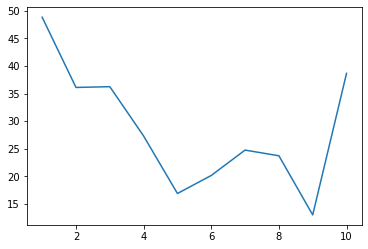

In [14]:
# Το train_test_split θα χωρίσει αυτόματα τα δεδομένα μας σε 2 μέρη 
from sklearn.model_selection import train_test_split

ls_mse_test = []
ls_max_depth = []
for current_max_depth in np.arange(10):
  
  # Which model: Instantiate decision trees (dt) regression
  dt_reg = DecisionTreeRegressor(max_depth=current_max_depth+1)

  # initialize empty list for single cv loop results
  

  # Loop to make cross validation
  

  # 1. Split data into training and testing set
  X_train, X_test, Y_train, Y_test = train_test_split(
    X, # αυτό είναι X 
    Y, #αυτό είναι Y
    test_size=0.2) 

  # 2. Train DT regressor with train data - fit the model with training data
  dt_reg.fit(X_train, Y_train)

  # 3. Test regressor with test data
  y_pred_test = dt_reg.predict(X_test)

  # 4. Calc metric (e.g. mse)
  current_mse_test = mean_squared_error(Y_test, y_pred_test)

  # 5. Append to list
  ls_mse_test.append(current_mse_test)
    
  # 6. append max depth
  ls_max_depth.append(current_max_depth+1)

# plot of MSE values over depths
plt.plot(ls_max_depth, ls_mse_test)